#### House prices
#### Cesar Alonso Lopez Anguiano

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('house_prices.csv')

#### Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Data Cleaning Convert date to datetime

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(inplace=True)
df = df.drop(columns=['id'])  # drop ID (non-predictive)
df.reset_index(drop=True, inplace=True)

#### Exploratory Data Analysis (10+ visualizations)

### 1. Distribution of House Prices

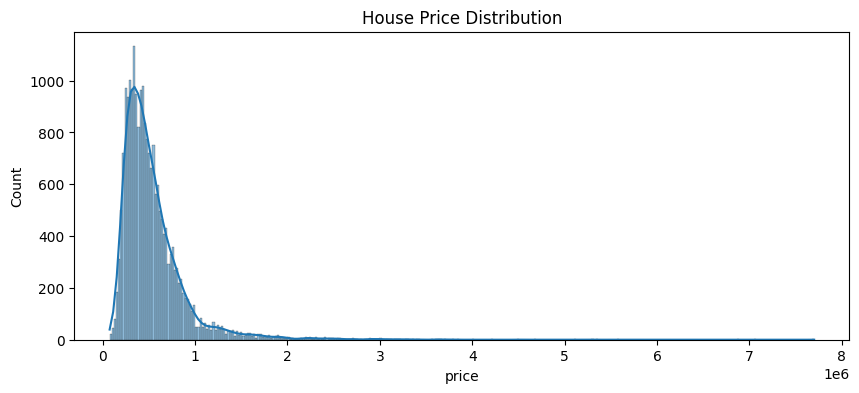

In [7]:
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], kde=True)
plt.title('House Price Distribution')
plt.show()

### 2. Price vs Sqft Living

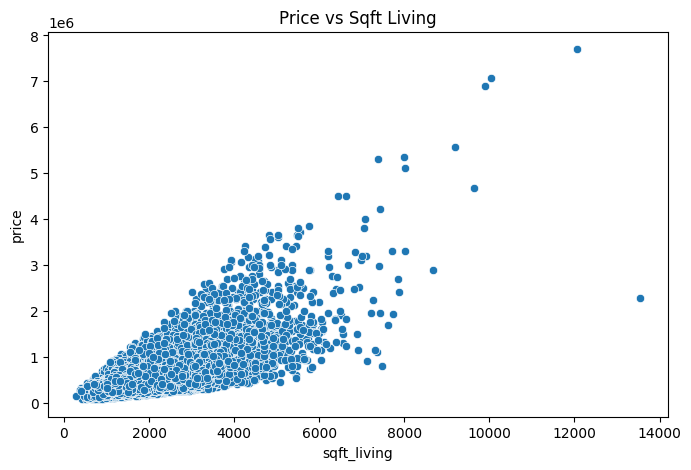

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs Sqft Living')
plt.show()

### 3. Boxplot by Bedrooms

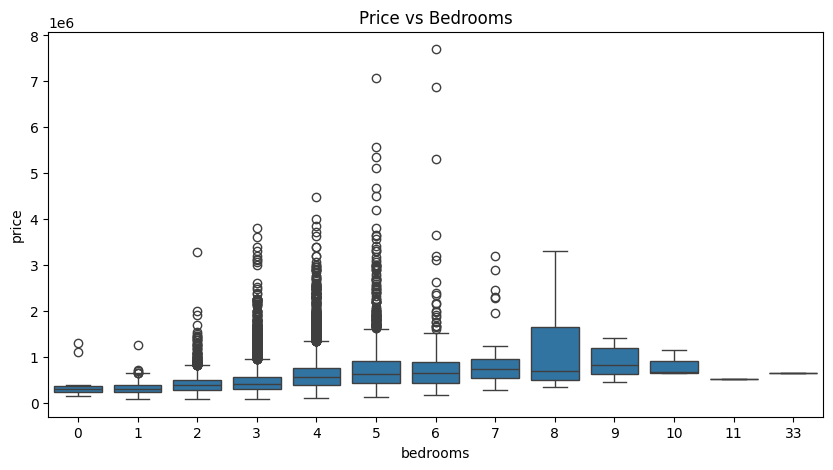

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Bedrooms')
plt.show()

### 4. Boxplot by Bathrooms

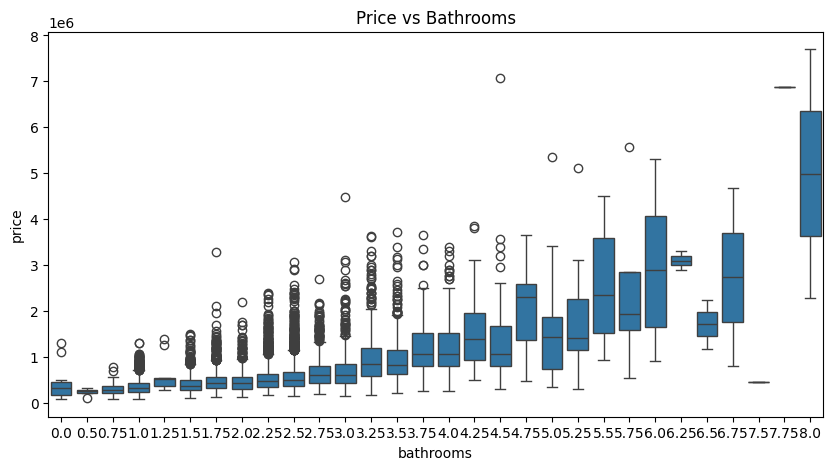

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price vs Bathrooms')
plt.show()

### 5. Price vs Grade

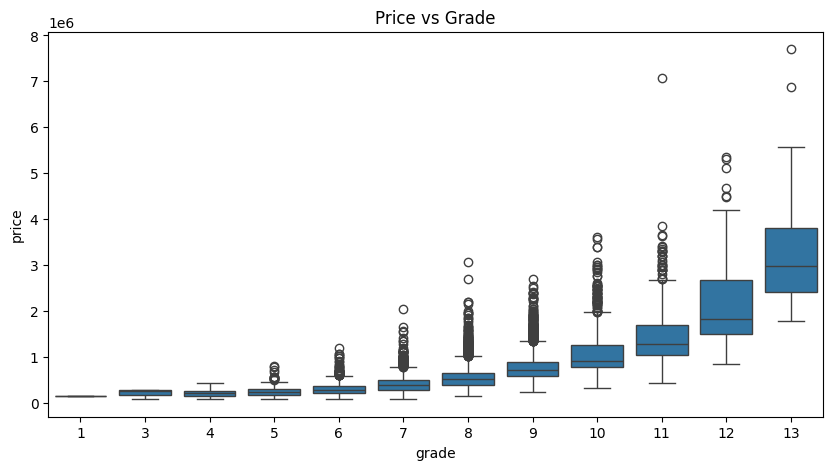

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='grade', y='price', data=df)
plt.title('Price vs Grade')
plt.show()

### 6. Correlation Heatmap

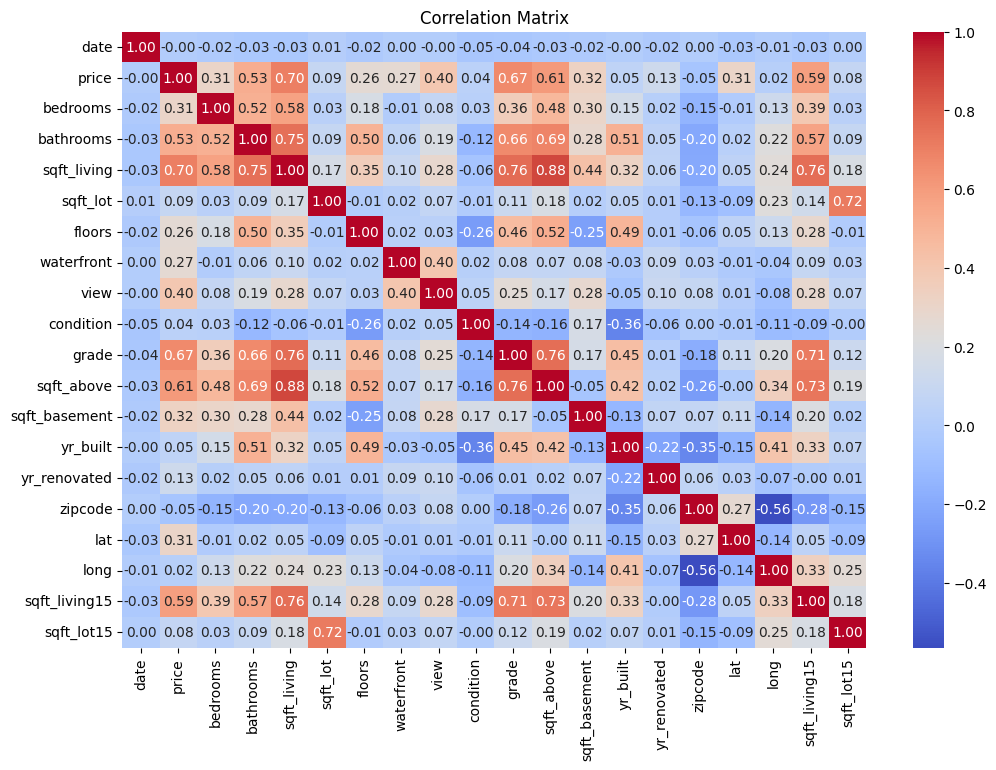

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 7. Price vs Year Built

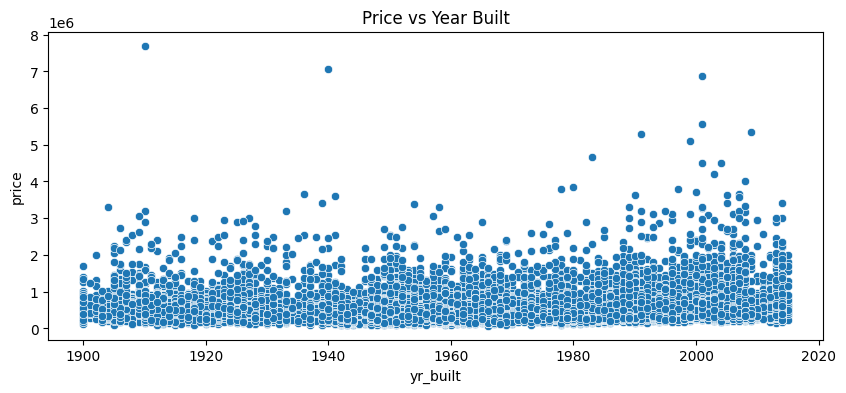

In [13]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='yr_built', y='price', data=df)
plt.title('Price vs Year Built')
plt.show()


### 8. Distribution of Bathrooms

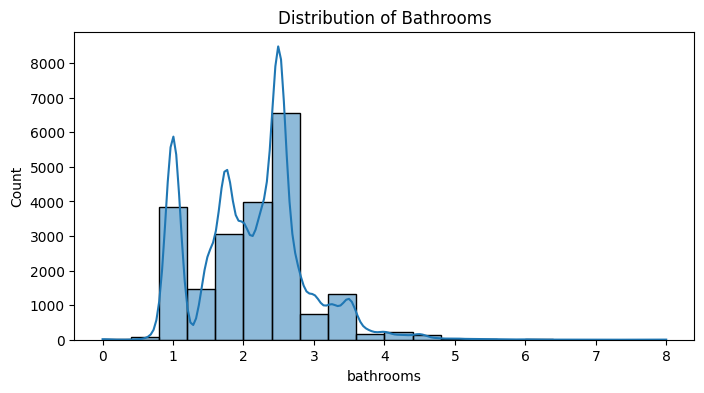

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df['bathrooms'], bins=20, kde=True)
plt.title("Distribution of Bathrooms")
plt.show()

### 9. Waterfront vs Price

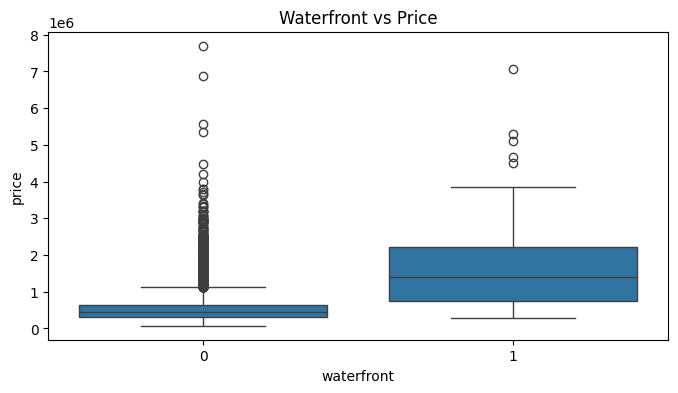

In [15]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Waterfront vs Price')
plt.show()

### 10. Floors vs Price

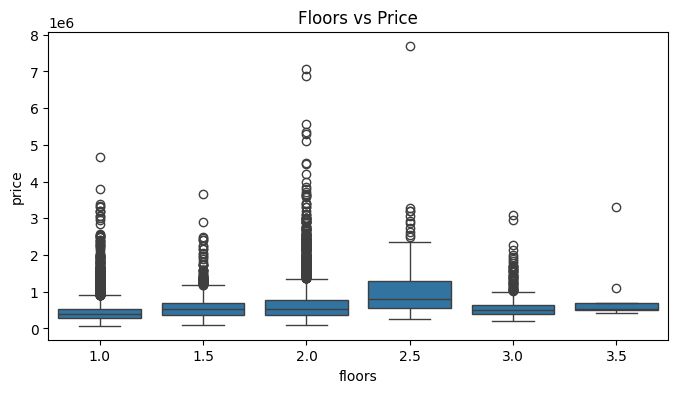

In [16]:

plt.figure(figsize=(8, 4))
sns.boxplot(x='floors', y='price', data=df)
plt.title('Floors vs Price')
plt.show()

#### Feature Selection Choose features based on correlation

In [17]:
features = ['sqft_living', 'grade', 'bathrooms', 'view', 'sqft_above']
X = df[features]
y = df[['price']]

#### Train-Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

#### Train Linear Regression Model

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Evaluate on Training Data

In [20]:
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print("Training RMSE:", train_rmse)
print("Training R²:", train_r2)

Training RMSE: 234633.95210511456
Training R²: 0.5786083811741562


#### Evaluate on Test Data

In [21]:
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)

Test RMSE: 249129.94545835716
Test R²: 0.5700822826599288


#### Predicted vs Actual Plot

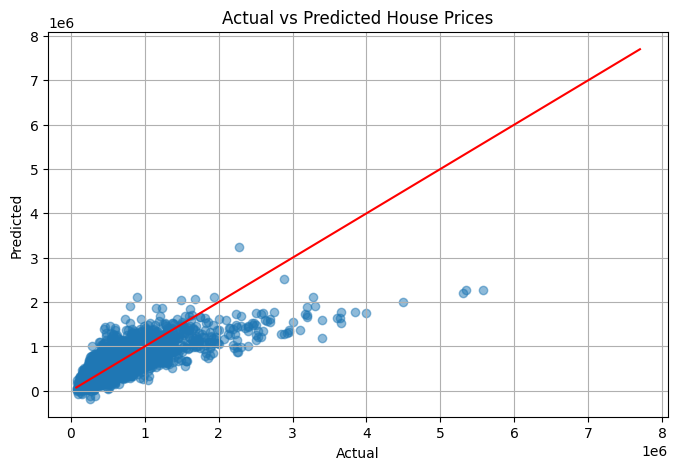

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()